In [8]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ROOT = os.path.join("/home", "niche", "cowsformer")
DIR_OUT = os.path.join(ROOT, "out", "yolov8")
RUNS = ["run_%d" % i for i in range(4)]

In [7]:
data = pd.read_csv(os.path.join(DIR_OUT, RUNS[0], "results.csv"))
for i in range(1, len(RUNS)):
    data_new = pd.read_csv(os.path.join(DIR_OUT, RUNS[i], "results.csv"))
    data = pd.concat([data, data_new])
data

,map5095,map50,precision,recall,f1,n_all,n_fn,n_fp,config,model,n
0,0.0875,0.1954,0.3324,0.2172,0.2627,709,590,89,1a_angle_t2s,yolov8n,20
1,0.1491,0.3034,0.4893,0.3047,0.3755,709,461,275,1a_angle_t2s,yolov8n,50
2,0.1441,0.2896,0.6645,0.2370,0.3493,709,511,186,1a_angle_t2s,yolov8n,100
3,0.1680,0.3333,0.5506,0.3117,0.3981,709,472,166,1a_angle_t2s,yolov8n,200
4,0.1507,0.2852,0.5201,0.2496,0.3374,709,516,162,1a_angle_t2s,yolov8n,500
...,...,...,...,...,...,...,...,...,...,...,...
116,0.2175,0.5233,0.5994,0.5039,0.5475,889,421,297,3_breed,yolov8m,50
117,0.1832,0.4327,0.6299,0.3746,0.4698,889,579,103,3_breed,yolov8m,100
118,0.1696,0.3794,0.5652,0.3566,0.4373,889,580,151,3_breed,yolov8m,200
119,0.2110,0.4864,0.6719,0.3948,0.4974,889,603,59,3_breed,yolov8m,250


In [28]:
data.query("config=='1b_angle_s2t' and n==20 and model == 'yolov8n'")

,map5095,map50,precision,recall,f1,n_all,n_fn,n_fp,config,model,n
5,0.1666,0.3052,0.9362,0.1222,0.2161,721,718,0,1b_angle_s2t,yolov8n,20
80,0.1666,0.3052,0.9362,0.1222,0.2161,721,718,0,1b_angle_s2t,yolov8n,20
5,0.1666,0.3052,0.9362,0.1222,0.2161,721,718,0,1b_angle_s2t,yolov8n,20
80,0.1666,0.3052,0.9362,0.1222,0.2161,721,718,0,1b_angle_s2t,yolov8n,20
5,0.1666,0.3052,0.9362,0.1222,0.2161,721,718,0,1b_angle_s2t,yolov8n,20
80,0.1666,0.3052,0.9362,0.1222,0.2161,721,718,0,1b_angle_s2t,yolov8n,20
5,0.1666,0.3052,0.9362,0.1222,0.2161,721,718,0,1b_angle_s2t,yolov8n,20
80,0.1666,0.3052,0.9362,0.1222,0.2161,721,718,0,1b_angle_s2t,yolov8n,20


<AxesSubplot: xlabel='n', ylabel='map50'>

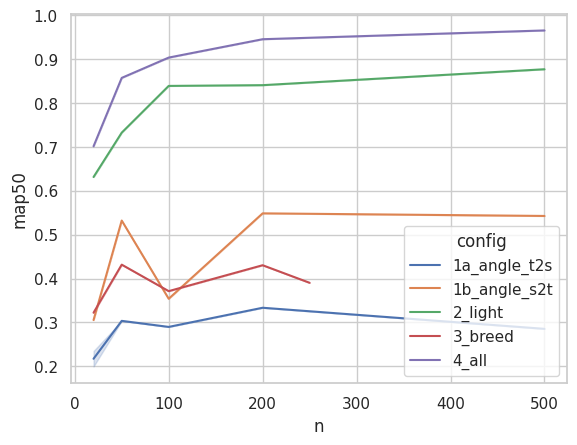

In [17]:
sns.lineplot(data=data.query("model == 'yolov8n'"), x="n", y="map50", hue="config",)

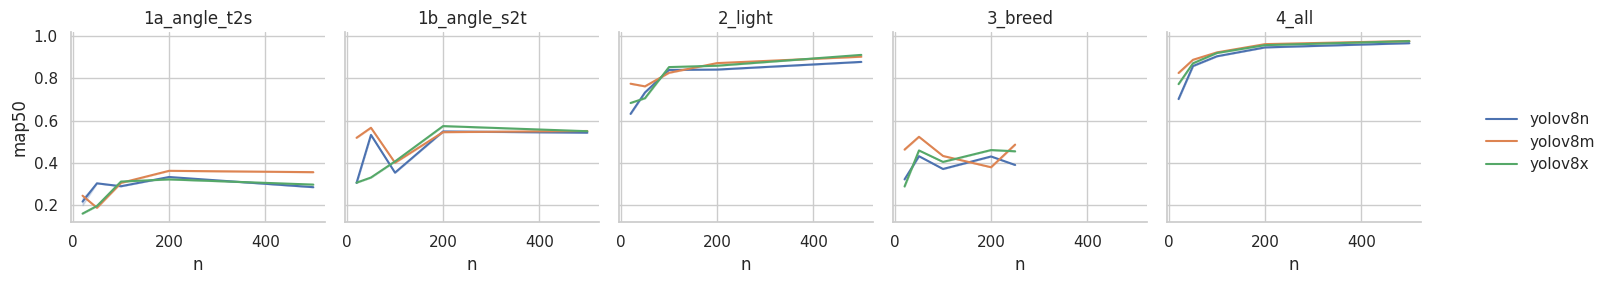

In [10]:
# x is n
# y is map50
# hue is model
# facet is config

sns.set(style="whitegrid")
g = sns.FacetGrid(data, col="config", margin_titles=True)
g.map(sns.lineplot, "n", "map50", "model")
g.set_axis_labels("n", "map50")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.add_legend()
plt.show()
